First we load the required packages.

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import pearsonr
from scipy.stats import norm
from matplotlib import cm
from matplotlib import colormaps
from gprofiler import GProfiler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('zoonomia_analysis_data_all_proteins_boolean_coverage_human.csv')

df = df.dropna(thresh=df.shape[1] - 4)
df.drop(['Species_name', 'Species', 'Order', 'Genome_coverage', 'Inward (Other)', 'Outward (Other)', 'Instrument_model', 'Average_bp_read', 'CMR', 'ICM'], axis=1, inplace=True)


/tmp/ipykernel_13543/4042252521.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271

In [3]:
correlation_matrix = df.corr()



In [ ]:
correlation_matrix = correlation_matrix.fillna(0)

In [4]:

correlation_matrix.to_csv('Correlation_matrix_fusions_all_proteins_human.csv')
# correlation_matrix.to_csv('Correlation_matrix_fusions_all_proteins_mouse.csv')

In [5]:
del correlation_matrix

In [3]:
#correlation_matrix_df = pd.read_csv('Correlation_matrix_fusions_all_proteins_human.csv')
columns = ['Unnamed: 0','Total_fusions_0', 'Total_fusions', 
           'Inward (Distance 0)', 'Outward (Distance 0)', 
           'Porcentage_variability', 'Chrom_num', 'Longevity', 'Total_telomere_size', 'Porcentage_TTAGGG']

correlation_matrix_2 = pd.read_csv('Correlation_matrix_fusions_all_proteins_human.csv', index_col='Unnamed: 0', usecols=columns)
print('done')

done


In [106]:
correlation_matrix_2 = correlation_matrix_2.fillna(0)
correlation_matrix_2.to_excel('Correlation_matrix_fusions_all_proteins_human_specific.xlsx')


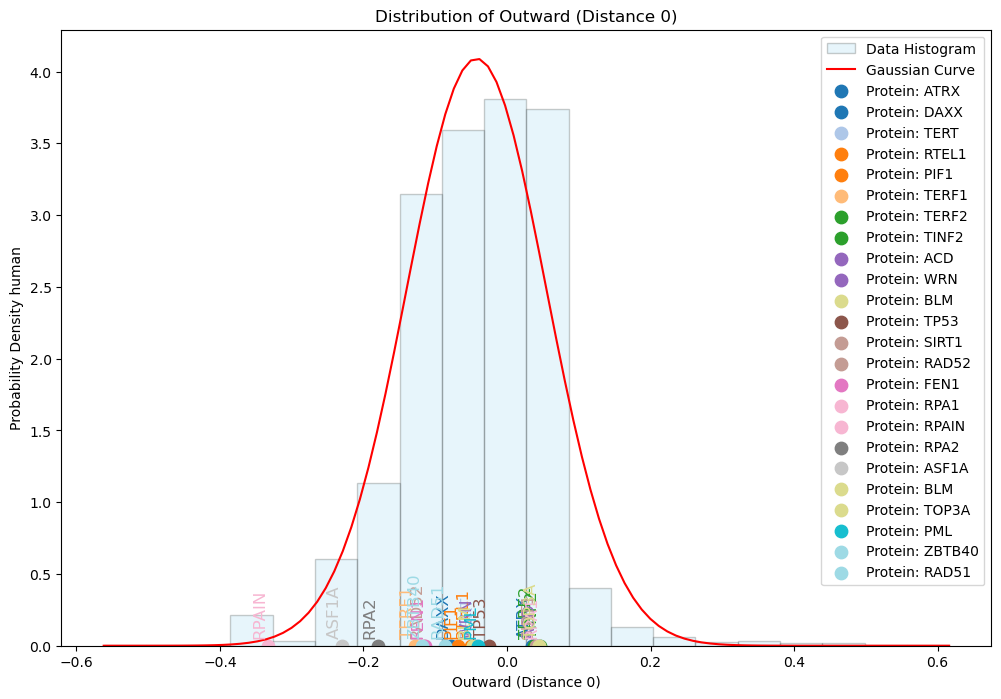

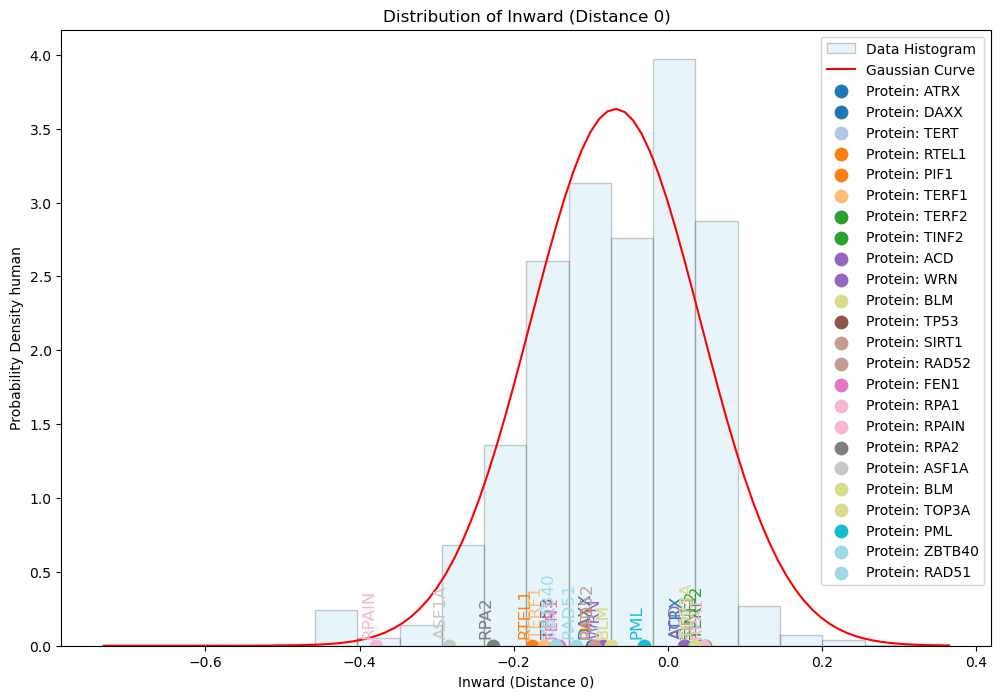

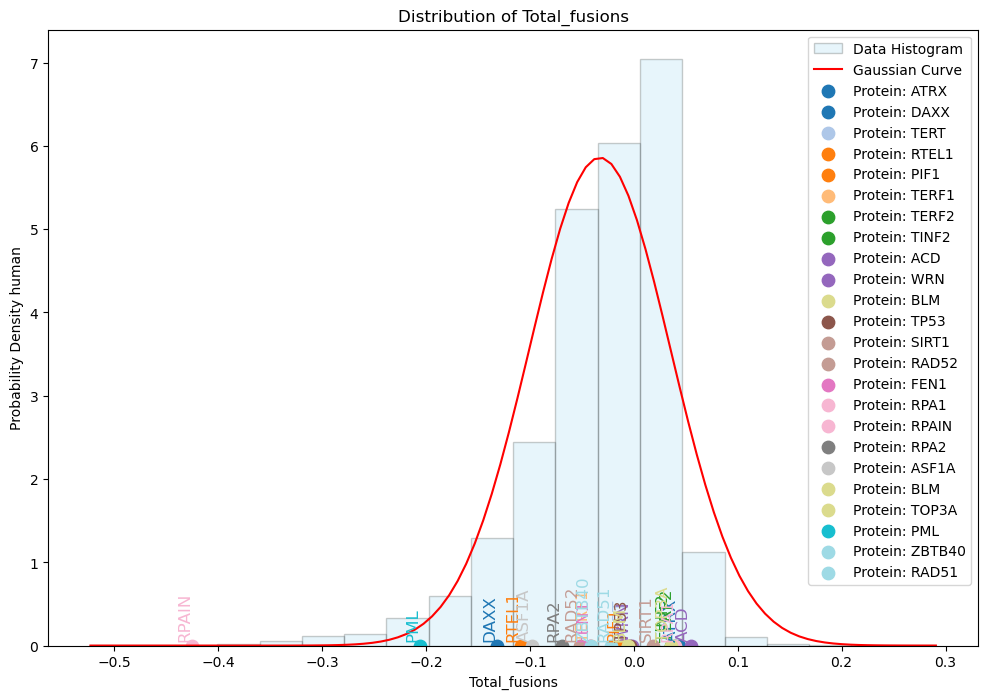

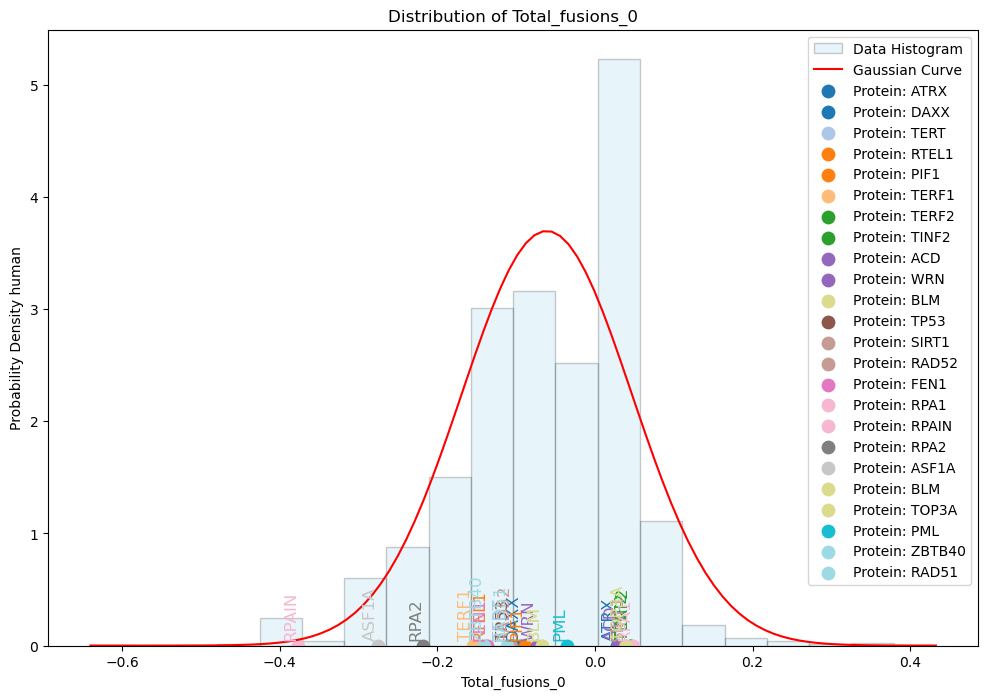

In [8]:

columns_name = ['Outward (Distance 0)','Inward (Distance 0)','Total_fusions', 'Total_fusions_0']

for column_name in columns_name:

    data = correlation_matrix_2[column_name]

    data = data[data.index.str.contains('_g_')]
    
    data = data.dropna()

    mean = np.mean(data)
    std_dev = np.std(data)

    x_values = np.linspace(data.min(), data.max(), 100)

    pdf_values = norm.pdf(x_values, mean, std_dev)

    proteins_to_search = ['ATRX', 'DAXX', 'TERT', 'RTEL1', 'PIF1', "TERF1", "TERF2", "TINF2", "TPP1", "POT1A",'POT1B', "DCR1B", "ACD", "WRN", "BLM", "TP53", "SIRT1", "RAD52", "FEN1", "RPA1", 'RPAIN', 'RPA2', 'ASF1A', 'ASF1B' 'SETDB1', 'RMI', 'BLM', 'TOP3A', 'PML', 'ZBTB40', 'RAD51']
    
    #colormap = cm.get_cmap('tab20', len(proteins_to_search))
    colormap = colormaps['tab20'].resampled(len(proteins_to_search))

    protein_colors = {protein: colormap(i) for i, protein in enumerate(proteins_to_search)}

    plt.figure(figsize=(12, 8))

    # histogram 
    plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.2, label='Data Histogram')

    # gaussian
    plt.plot(x_values, pdf_values, color='red', label='Gaussian Curve')

    plt.xlabel(column_name)
    plt.ylabel('Probability Density human')
    plt.title(f'Distribution of {column_name}')

    for protein in proteins_to_search:
        protein_name = f'{protein}_g_ENSG' # for human
        #protein_name = f'{protein}_g_ENSMUSG' # for mouse


        matching_indices = data.index[data.index.str.contains(protein_name, case=False)]
        
        if not matching_indices.empty:
            for index in matching_indices:
                protein_name_match = index.split('_')[0].upper()

                if protein_name_match == protein:
                    protein_value = data.loc[index]

                    color = protein_colors[protein]

                    plt.scatter(protein_value, 0, color=color, label=f'Protein: {protein}', s=80)
                    plt.text(protein_value, 0.05, protein, fontsize=12, color=color, ha='right', va='bottom', rotation=90)

    plt.legend()
    plt.show()

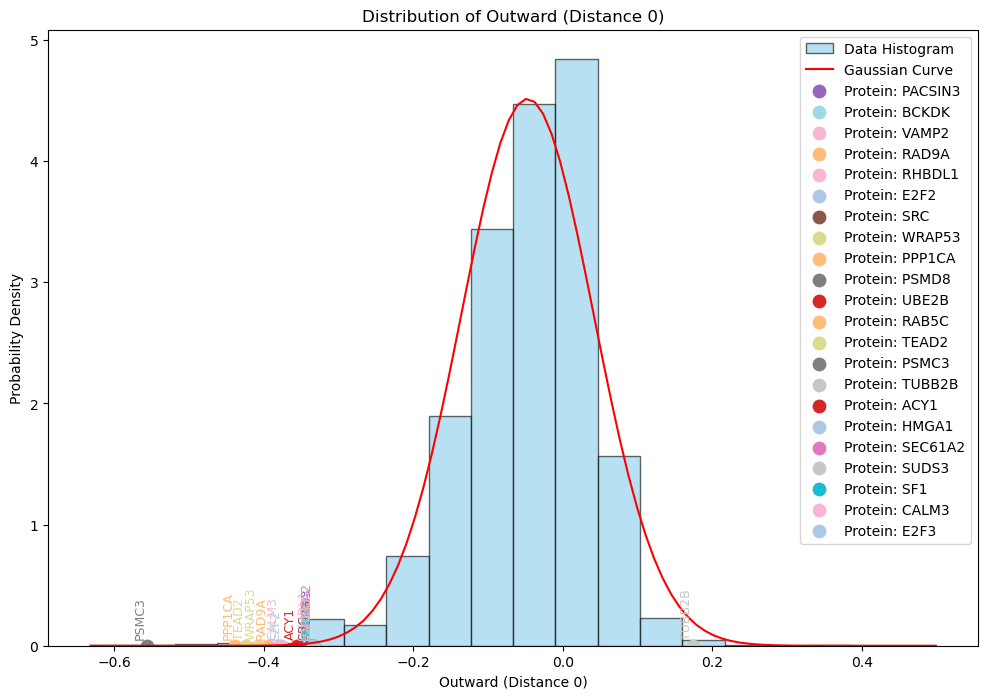

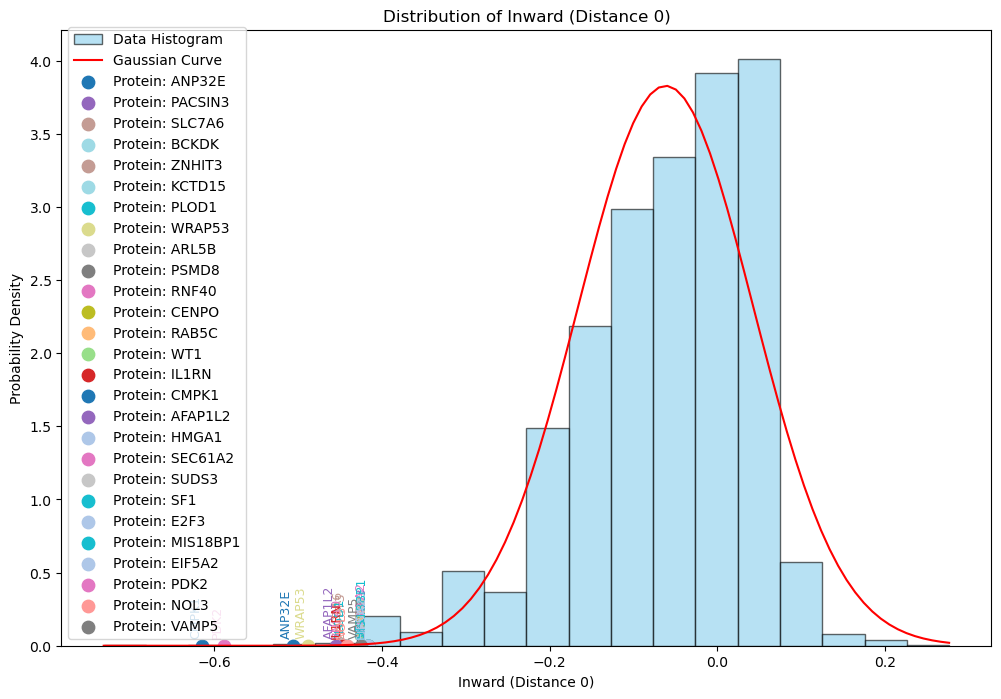

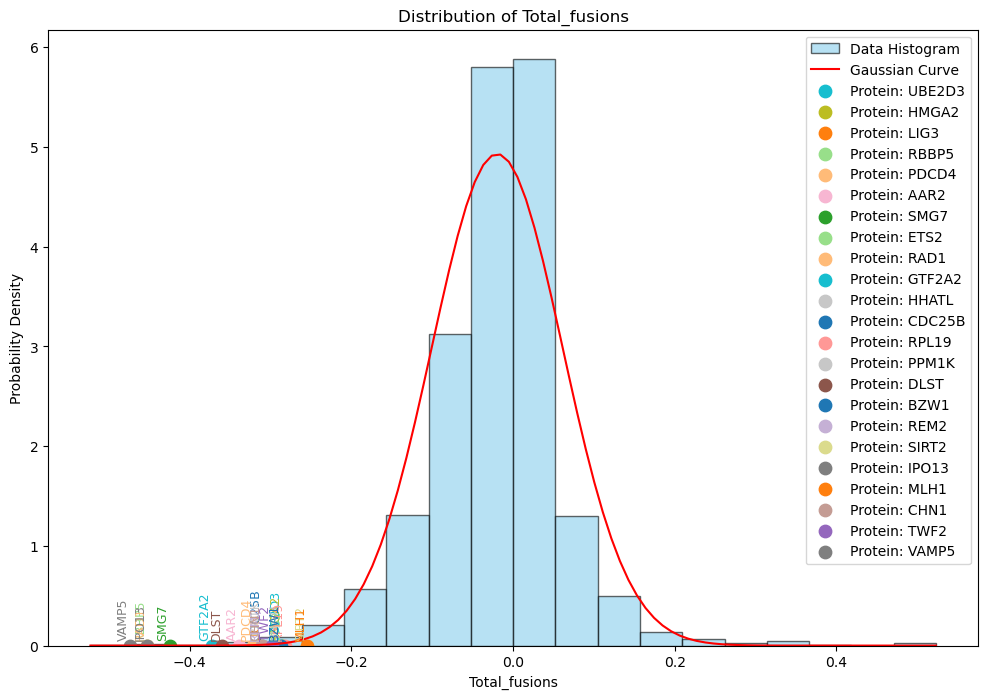

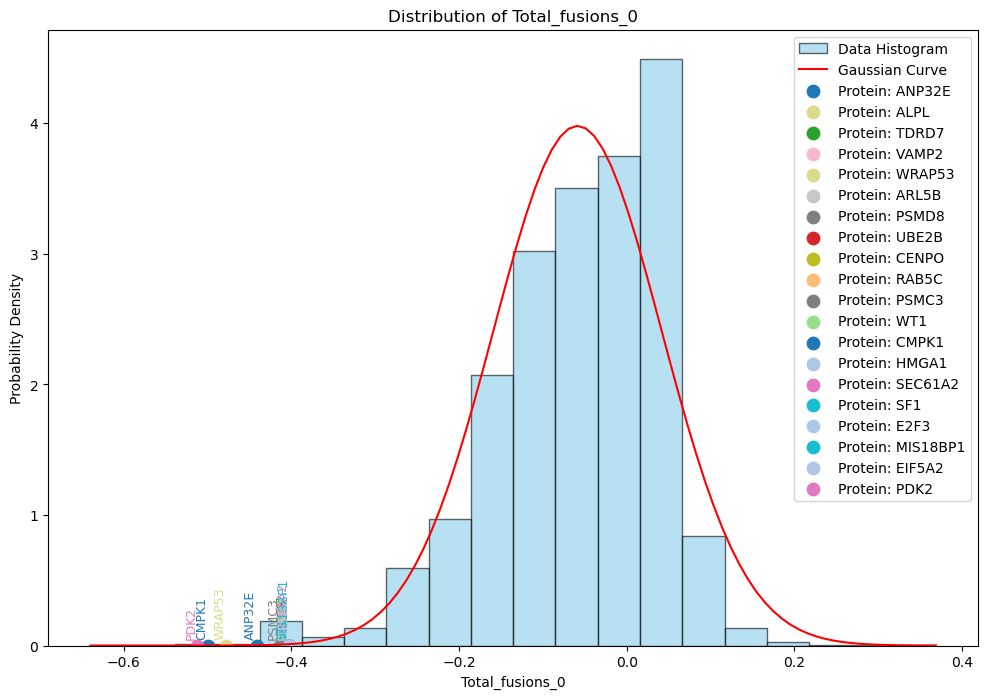

In [48]:


# Columnas a procesar
columns_name = ['Outward (Distance 0)', 'Inward (Distance 0)', 'Total_fusions', 'Total_fusions_0']

# Iterar sobre las columnas
for column_name in columns_name:
    # Cargar los datos de la columna
    data = correlation_matrix_2[column_name]
    
    # Filtrar filas que contengan '_g_'
    data = data[data.index.str.contains('_g_')]
    
    # Eliminar valores nulos
    data = data.dropna()

    # Calcular media y desviación estándar
    mean = np.mean(data)
    std_dev = np.std(data)

    # Generar valores x para la curva gaussiana
    x_values = np.linspace(data.min(), data.max(), 100)
    pdf_values = norm.pdf(x_values, mean, std_dev)

    # Cargar las proteínas de interés desde el archivo Excel
    protein_to_search_telomere = pd.read_excel('TelNet.xlsx', header=None)
    column_2 = protein_to_search_telomere.iloc[:, 1]

    # Convertir `column_2` a un conjunto para búsqueda eficiente
    proteins_to_search_set = set(column_2)
    # Obtener el colormap
    colormap = colormaps['tab20'].resampled(len(proteins_to_search_set))
    protein_colors = {protein: colormap(i) for i, protein in enumerate(column_2)}

    plt.figure(figsize=(12, 8))

    # Histograma
    plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.6, label='Data Histogram')

    # Curva gaussiana
    plt.plot(x_values, pdf_values, color='red', label='Gaussian Curve')

    plt.xlabel(column_name)
    plt.ylabel('Probability Density human')
    plt.title(f'Distribution of {column_name}')

    # Ordenar los valores de data
    sorted_data = data.sort_values()

    # Seleccionar los 20 valores más bajos
    lowest_values_indices = sorted_data.head(200).index

    # Seleccionar los 5 valores más altos
    highest_values_indices = sorted_data.tail(50).index

    # Combinar ambos conjuntos de índices para iterar sobre ellos
    combined_indices = set(lowest_values_indices).union(highest_values_indices)

    # Iterar sobre los índices combinados
    for index in combined_indices:
        protein_name = index.split('_')[0].upper()
        protein_value = data.loc[index]

        # Verificar si la proteína está en el conjunto de proteínas a buscar
        if protein_name in proteins_to_search_set:
           
            # Obterner el color correspondiente de `protein_colors`
            color = protein_colors[protein_name]

            # Representar la proteína en el gráfico
            plt.scatter(protein_value, 0, color=color, label=f'Protein: {protein_name}', s=80)
            plt.text(protein_value, 0.05, protein_name, fontsize=9, color=color, ha='right', va='bottom', rotation=90)

    plt.legend()
    plt.show()


In [9]:
columns = ['Unnamed: 0','Total_fusions_0', 'Total_fusions', 
           'Inward (Distance 0)', 'Outward (Distance 0)', 
           'Porcentage_variability', 'Chrom_num', 'Longevity', 'Total_telomere_size', 'Porcentage_TTAGGG']

correlation_matrix_2 = pd.read_csv('Correlation_matrix_fusions_all_proteins_mouse.csv', index_col='Unnamed: 0', usecols=columns)

In [40]:
correlation_matrix_2 = correlation_matrix_2.fillna(0)
correlation_matrix_2.to_excel('Correlation_matrix_fusions_all_proteins_mouse_specific.xlsx')

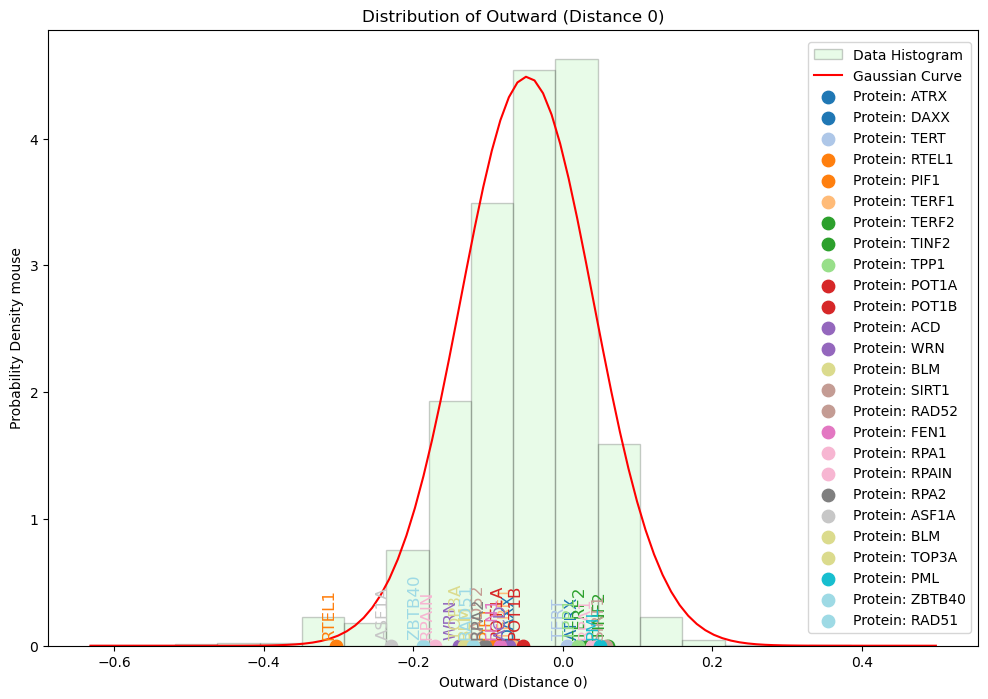

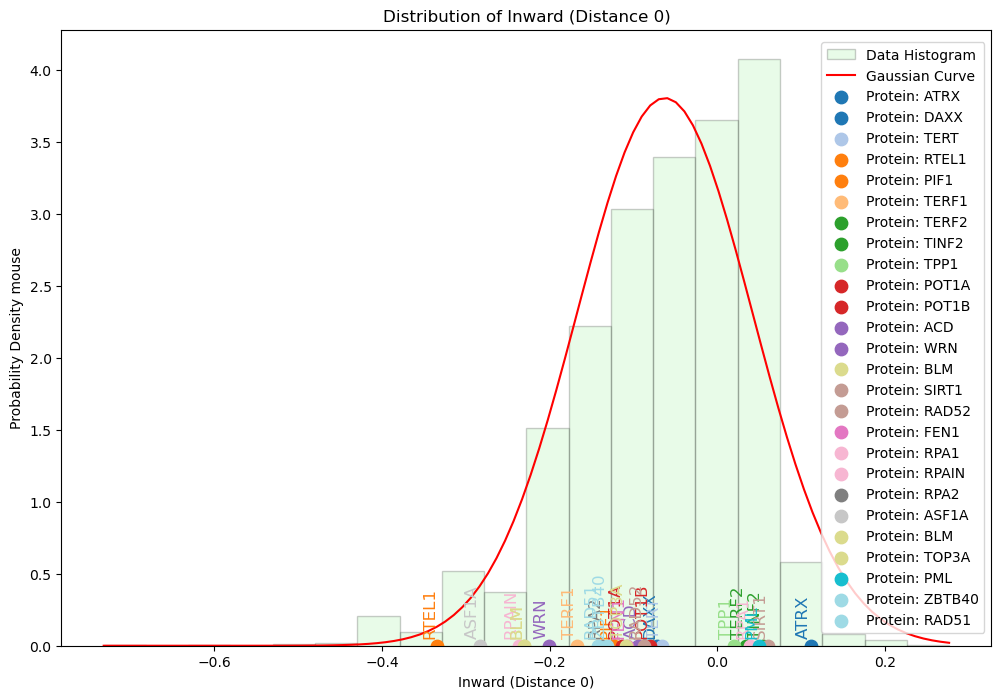

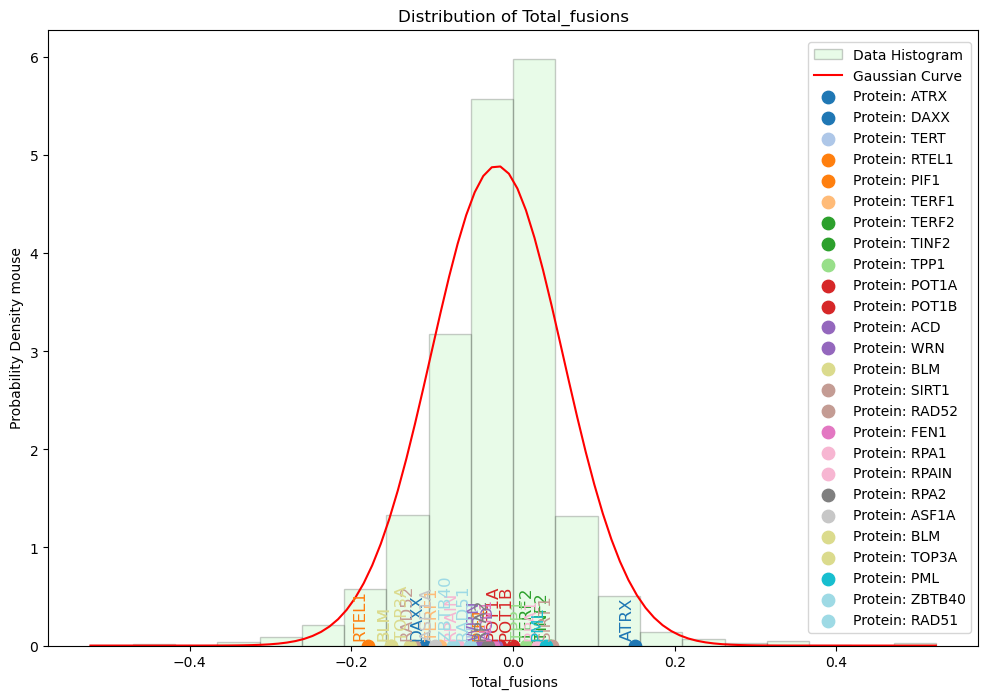

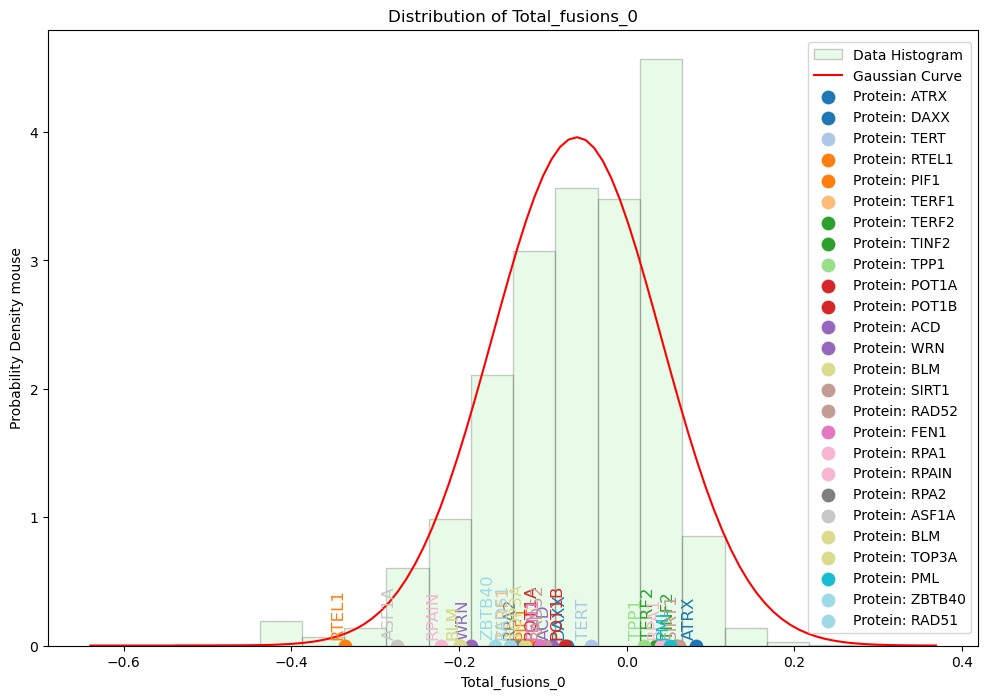

In [11]:
columns_name = ['Outward (Distance 0)','Inward (Distance 0)','Total_fusions', 'Total_fusions_0']

for column_name in columns_name:

    data = correlation_matrix_2[column_name]

    data = data[data.index.str.contains('_g_')]
    
    data = data.dropna()

    mean = np.mean(data)
    std_dev = np.std(data)

    x_values = np.linspace(data.min(), data.max(), 100)

    pdf_values = norm.pdf(x_values, mean, std_dev)

    proteins_to_search = ['ATRX', 'DAXX', 'TERT', 'RTEL1', 'PIF1', "TERF1", "TERF2", "TINF2", "TPP1", "POT1A",'POT1B', "DCR1B", "ACD", "WRN", "BLM", "TP53", "SIRT1", "RAD52", "FEN1", "RPA1", 'RPAIN', 'RPA2', 'ASF1A', 'ASF1B' 'SETDB1', 'RMI', 'BLM', 'TOP3A', 'PML', 'ZBTB40', 'RAD51']
    
    #colormap = cm.get_cmap('tab20', len(proteins_to_search))
    colormap = colormaps['tab20'].resampled(len(proteins_to_search))

    protein_colors = {protein: colormap(i) for i, protein in enumerate(proteins_to_search)}

    plt.figure(figsize=(12, 8))

    # histogram 
    plt.hist(data, bins=20, color='lightgreen', edgecolor='black', density=True, alpha=0.2, label='Data Histogram')

    # gaussian
    plt.plot(x_values, pdf_values, color='red', label='Gaussian Curve')

    plt.xlabel(column_name)
    plt.ylabel('Probability Density mouse')
    plt.title(f'Distribution of {column_name}')

    for protein in proteins_to_search:
        #protein_name = f'{protein}_g_ENSG' # for human
        protein_name = f'{protein}_g_ENSMUSG' # for mouse


        matching_indices = data.index[data.index.str.contains(protein_name, case=False)]
        
        if not matching_indices.empty:
            for index in matching_indices:
                protein_name_match = index.split('_')[0].upper()

                if protein_name_match == protein:
                    protein_value = data.loc[index]

                    color = protein_colors[protein]

                    plt.scatter(protein_value, 0, color=color, label=f'Protein: {protein}', s=80)
                    plt.text(protein_value, 0.05, protein, fontsize=12, color=color, ha='right', va='bottom', rotation=90)

    plt.legend(loc = "right")
    plt.show()

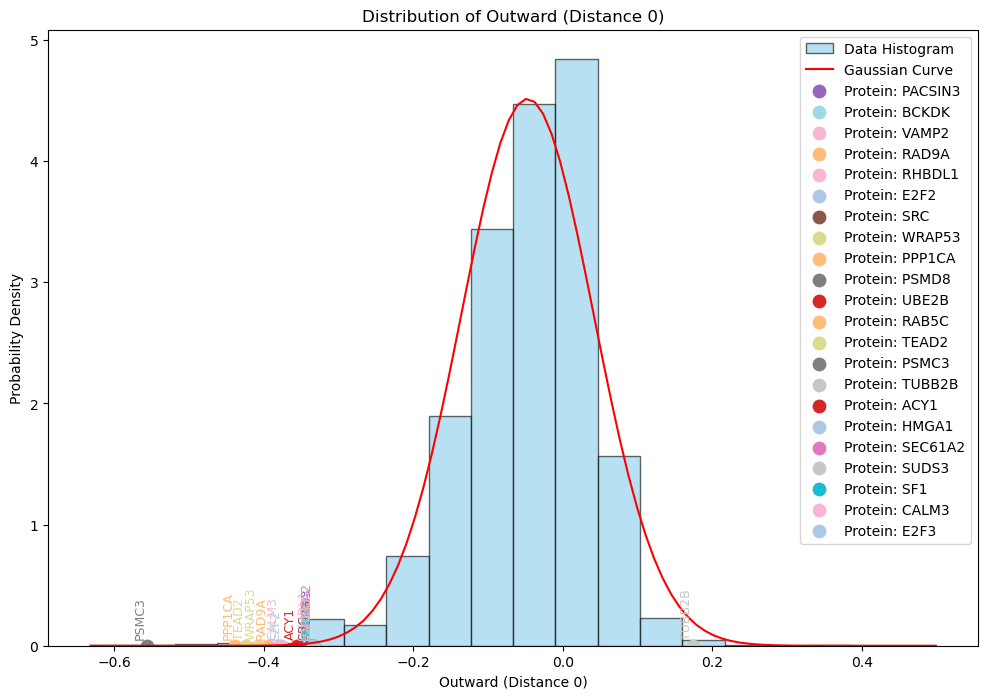

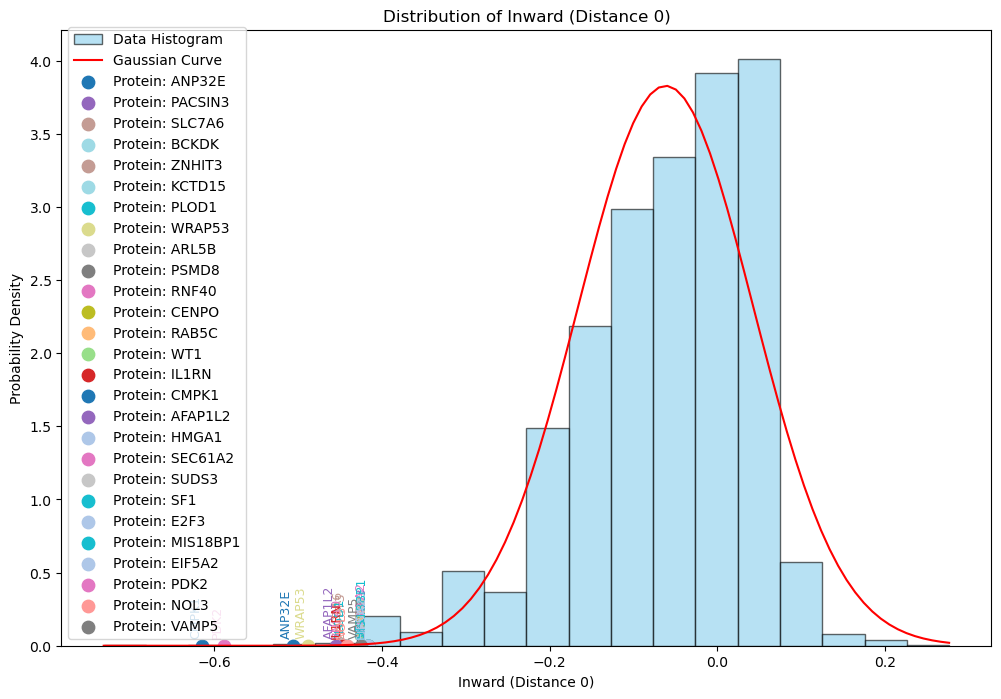

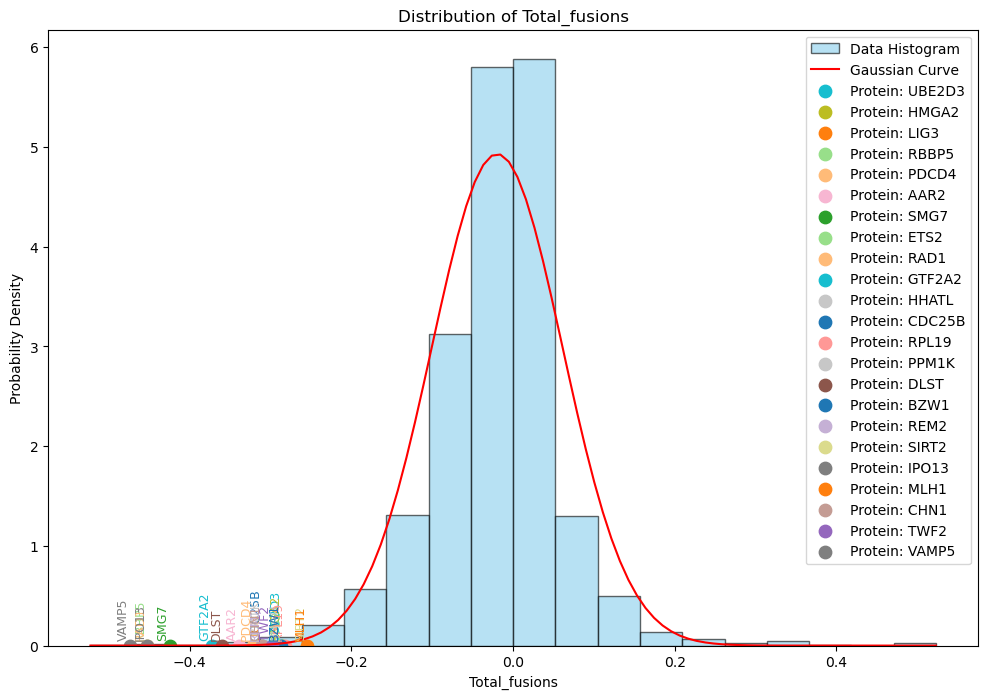

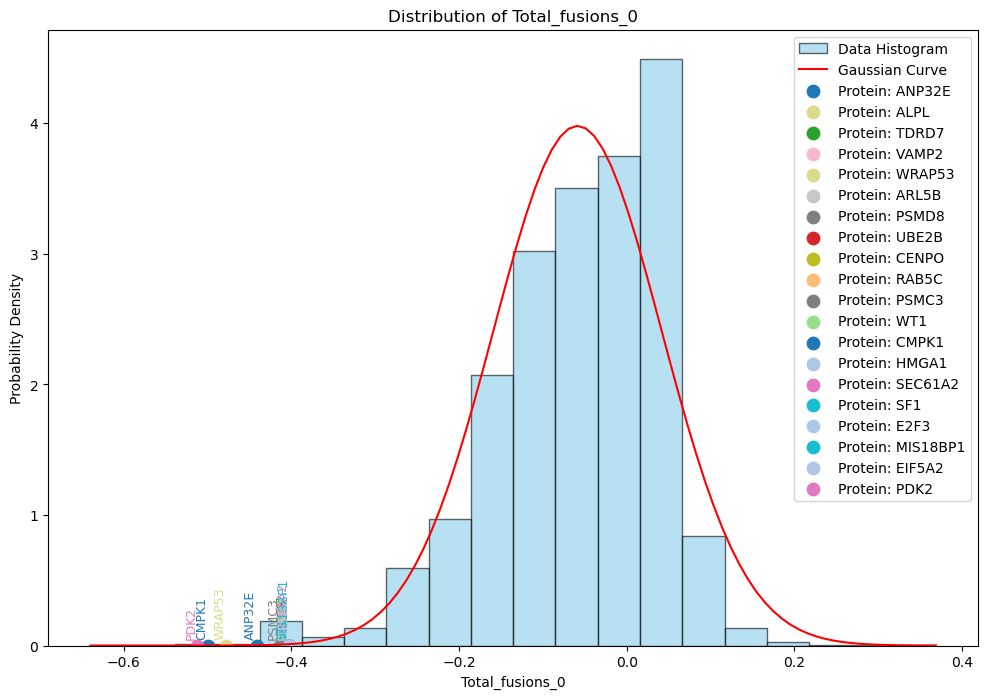

In [49]:
# Columnas a procesar
columns_name = ['Outward (Distance 0)', 'Inward (Distance 0)', 'Total_fusions', 'Total_fusions_0']

# Iterar sobre las columnas
for column_name in columns_name:
    # Cargar los datos de la columna
    data = correlation_matrix_2[column_name]
    
    # Filtrar filas que contengan '_g_'
    data = data[data.index.str.contains('_g_')]
    
    # Eliminar valores nulos
    data = data.dropna()

    # Calcular media y desviación estándar
    mean = np.mean(data)
    std_dev = np.std(data)

    # Generar valores x para la curva gaussiana
    x_values = np.linspace(data.min(), data.max(), 100)
    pdf_values = norm.pdf(x_values, mean, std_dev)

    # Cargar las proteínas de interés desde el archivo Excel
    protein_to_search_telomere = pd.read_excel('TelNet.xlsx', header=None)
    column_2 = protein_to_search_telomere.iloc[:, 1]

    # Convertir `column_2` a un conjunto para búsqueda eficiente
    proteins_to_search_set = set(column_2)
    # Obtener el colormap
    colormap = colormaps['tab20'].resampled(len(proteins_to_search_set))
    protein_colors = {protein: colormap(i) for i, protein in enumerate(column_2)}

    plt.figure(figsize=(12, 8))

    # Histograma
    plt.hist(data, bins=20, color='skyblue', edgecolor='black', density=True, alpha=0.6, label='Data Histogram')

    # Curva gaussiana
    plt.plot(x_values, pdf_values, color='red', label='Gaussian Curve')

    plt.xlabel(column_name)
    plt.ylabel('Probability Density mouse')
    plt.title(f'Distribution of {column_name}')

    # Ordenar los valores de data
    sorted_data = data.sort_values()

    # Seleccionar los 20 valores más bajos
    lowest_values_indices = sorted_data.head(200).index

    # Seleccionar los 5 valores más altos
    highest_values_indices = sorted_data.tail(50).index

    # Combinar ambos conjuntos de índices para iterar sobre ellos
    combined_indices = set(lowest_values_indices).union(highest_values_indices)

    # Iterar sobre los índices combinados
    for index in combined_indices:
        protein_name = index.split('_')[0].upper()
        protein_value = data.loc[index]

        # Verificar si la proteína está en el conjunto de proteínas a buscar
        if protein_name in proteins_to_search_set:
           
            # Obterner el color correspondiente de `protein_colors`
            color = protein_colors[protein_name]

            # Representar la proteína en el gráfico
            plt.scatter(protein_value, 0, color=color, label=f'Protein: {protein_name}', s=80)
            plt.text(protein_value, 0.05, protein_name, fontsize=9, color=color, ha='right', va='bottom', rotation=90)

    plt.legend()
    plt.show()

In [ ]:
df = pd.read_csv('zoonomia_analysis_data_all_proteins_boolean_coverage_mouse.csv')

In [51]:

#df = df[df['Instrument_model'] != 'NextSeq 500']
#df = df[~df['Species_name'].str.endswith('_2')]
df = df.dropna(thresh=df.shape[1] - 4)
# Lista de columnas de proteínas
protein_columns = df.filter(like='_g_').columns
total_fusions_0 = df['Total_fusions_0']
Inward_0 = df['Inward (Distance 0)']
Outward_0 = df['Outward (Distance 0)']
variability = df['Porcentage_variability']
telomere_size = df['Total_telomere_size']


p_values_k_I = {}
p_values_k_O = {}
p_values_k_T = {}
p_values_k_V = {}
p_values_k_S = {}

for protein in protein_columns:
    group_T = [total_fusions_0[df[protein] == category] for category in [True, False]]
    group_I = [Inward_0[df[protein] == category] for category in [True, False]]
    group_O = [Outward_0[df[protein] == category] for category in [True, False]]
    group_V = [variability[df[protein] == category] for category in [True, False]]
    group_S = [telomere_size[df[protein] == category] for category in [True, False]]
    
    stat, p_value_t = kruskal(*group_T)
    stat, p_value_i = kruskal(*group_I)
    stat, p_value_o = kruskal(*group_O)
    stat, p_value_v = kruskal(*group_V)
    stat, p_value_s = kruskal(*group_S)

    p_values_k_T[protein] = p_value_t
    p_values_k_I[protein] = p_value_o
    p_values_k_O[protein] = p_value_i
    p_values_k_V[protein] = p_value_v
    p_values_k_S[protein] = p_value_s


/tmp/ipykernel_17723/3572417664.py:1: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271

In [52]:
# Convierte los diccionarios de p-values en Series de pandas
p_values_T_series = pd.Series(p_values_k_T, name='Total_fusions_0_p_value')
p_values_I_series = pd.Series(p_values_k_I, name='Inward_0_p_value')
p_values_O_series = pd.Series(p_values_k_O, name='Outward_0_p_value')
p_values_V_series = pd.Series(p_values_k_V, name='Porcentage_variability_p_value')
p_values_S_series = pd.Series(p_values_k_S, name='Total_telomere_size_p_value')

# Combina las Series en un DataFrame
result_df = pd.concat([p_values_T_series, p_values_I_series, p_values_O_series, p_values_V_series, p_values_S_series], axis=1)
# Guarda el DataFrame resultante en un archivo CSV
result_df.to_excel('kruskal_all_proteins_mouse_p_values.xlsx', index=True)

In [102]:

archivo = 'kruskal_all_proteins_mouse_p_values.xlsx'
data = pd.read_excel(archivo, index_col=0)
data.fillna(1)
data_genes = data[data.index.str.contains('_g_')]
data_genes.loc[:, 'Protein'] = data_genes.index.str.split('_').str[0]
data_genes.loc[:, 'Gene'] = data_genes.index.str.split('_').str[2]

threshold = 0.01
gene_scores = data_genes.set_index(data_genes.columns[6])['Total_fusions_0_p_value']
gene_scores = gene_scores[gene_scores <= threshold]
genes_to_analyze = gene_scores.index.tolist()
# Crear una instancia de GProfiler
gp = GProfiler(return_dataframe=True)

results = gp.profile(
    organism='mmusculus',  
    query=genes_to_analyze,
    sources=['GO', 'KEGG']  )

results.to_excel('GSEA_mouse_all_proteins.xlsx')


In [ ]:
df = pd.read_csv('zoonomia_analysis_data_all_proteins_boolean_coverage_human.csv')
df.drop(['Species_name', 'Species', 'Order', 'Genome_coverage', 'Inward (Other)', 'Outward (Other)', 'Instrument_model', 'Average_bp_read', 'CMR', 'ICM'], axis=1, inplace=True)
df = df.dropna(thresh=df.shape[1] - 4)


In [ ]:

columns = ['Total_fusions_0', 'Total_fusions', 
           'Inward (Distance 0)', 'Outward (Distance 0)', 
           'Porcentage_variability', 'Chrom_num', 'Longevity', 'Total_telomere_size', 'Porcentage_TTAGGG']


feature_importance_dfs = []
for column in columns:

    mean = df[column].mean()
    df[column] = df[column].fillna(mean)
    
    y = df[column]
    X = df.filter(like='_g_')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    # Analizar la importancia de las características
    feature_importances = rf.feature_importances_

    # Crear un DataFrame con las características y su importancia
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': feature_importances
    })

    # Ordenar por importancia
    feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)
    feature_importance_df = feature_importance_df.head(100)
    
    info_df = pd.DataFrame({
        'feature': [column, 'Mean Squared Error', 'R^2 Score'],
        'importance': [np.nan, mse, r2]
    })

    feature_importance_df = pd.concat([info_df, feature_importance_df]).reset_index(drop=True)

    feature_importance_dfs.append(feature_importance_df)
    print(feature_importance_df)

print(feature_importance_dfs)

208495.88779642546
Total_fusions_0


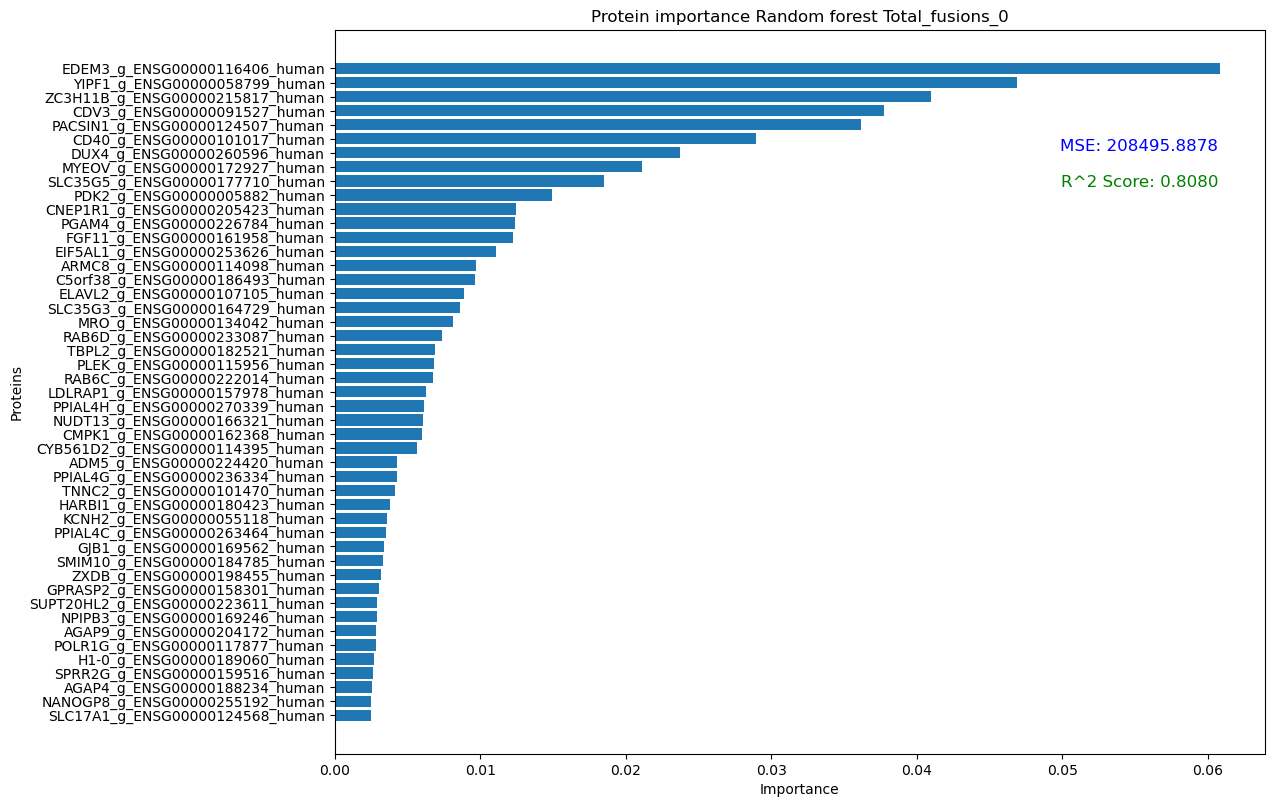

11968196.64528145
Total_fusions


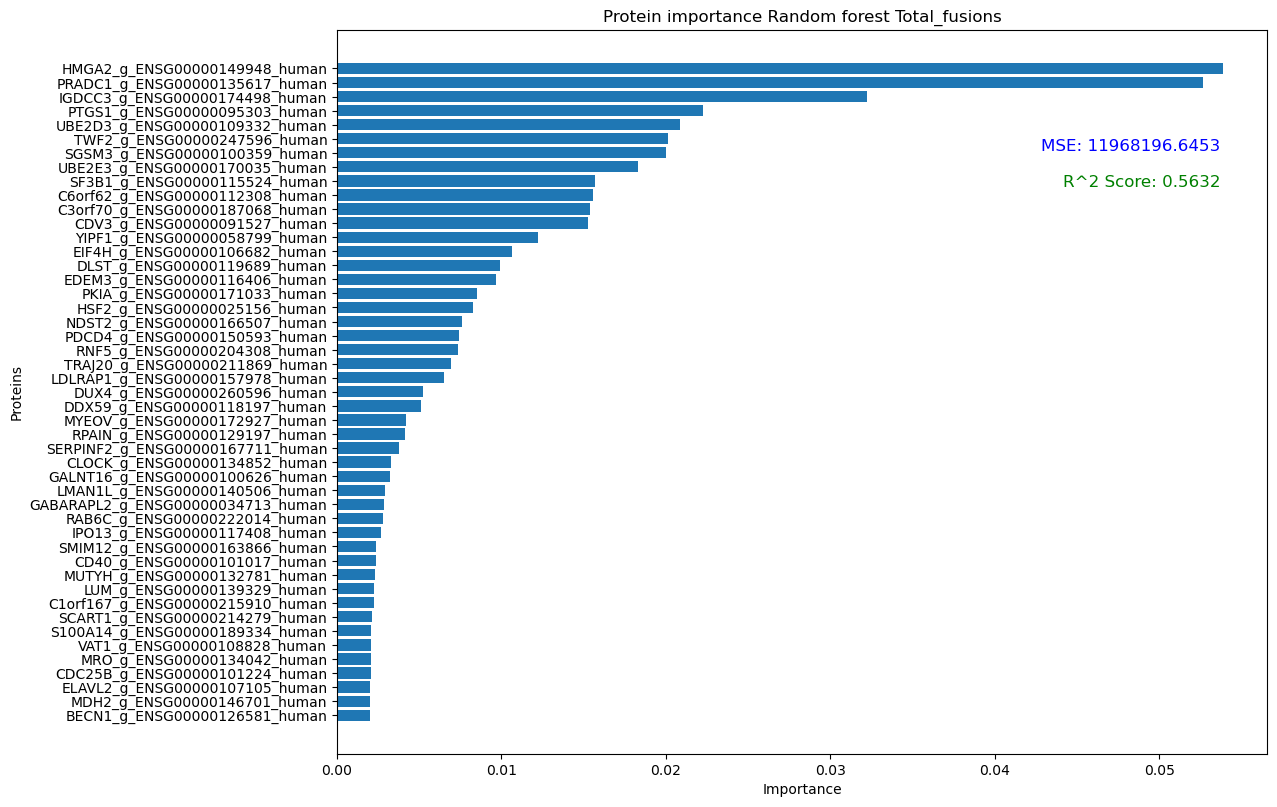

83084.35285067518
Inward (Distance 0)


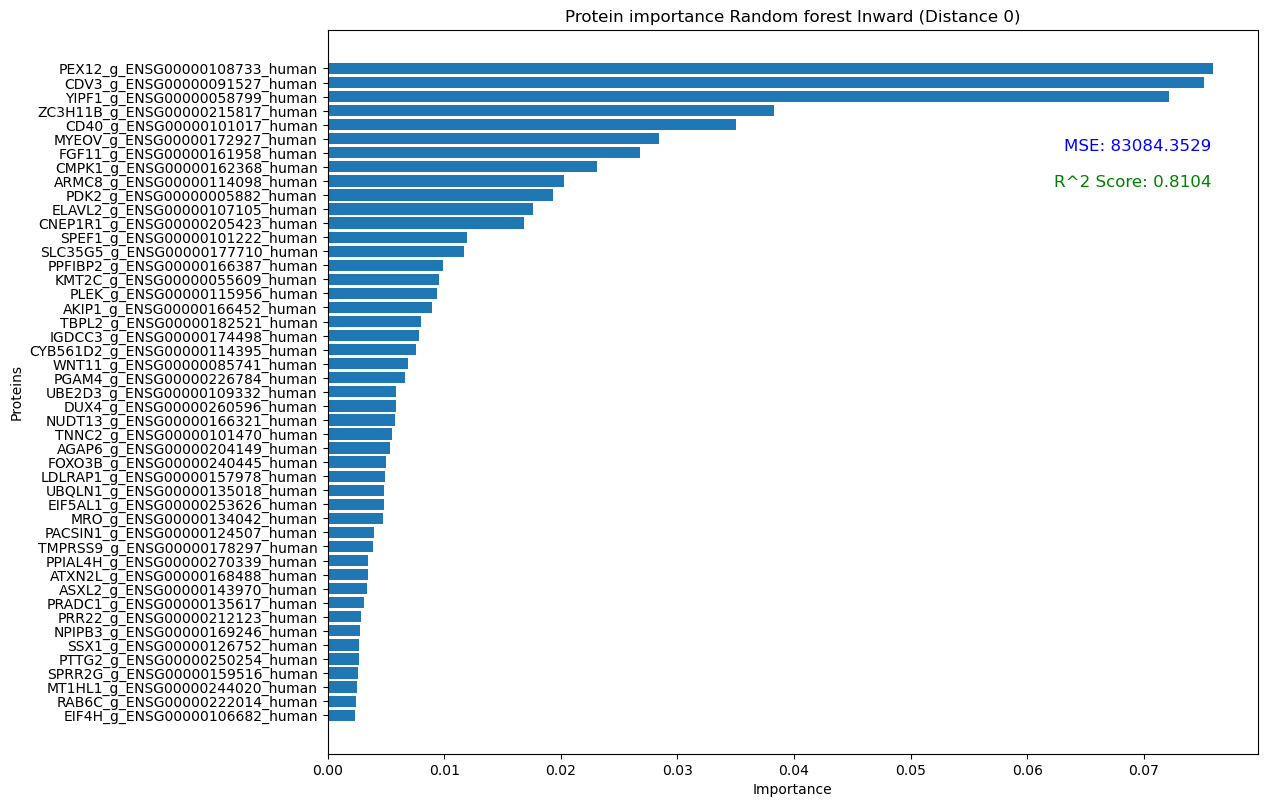

36223.33441786337
Outward (Distance 0)


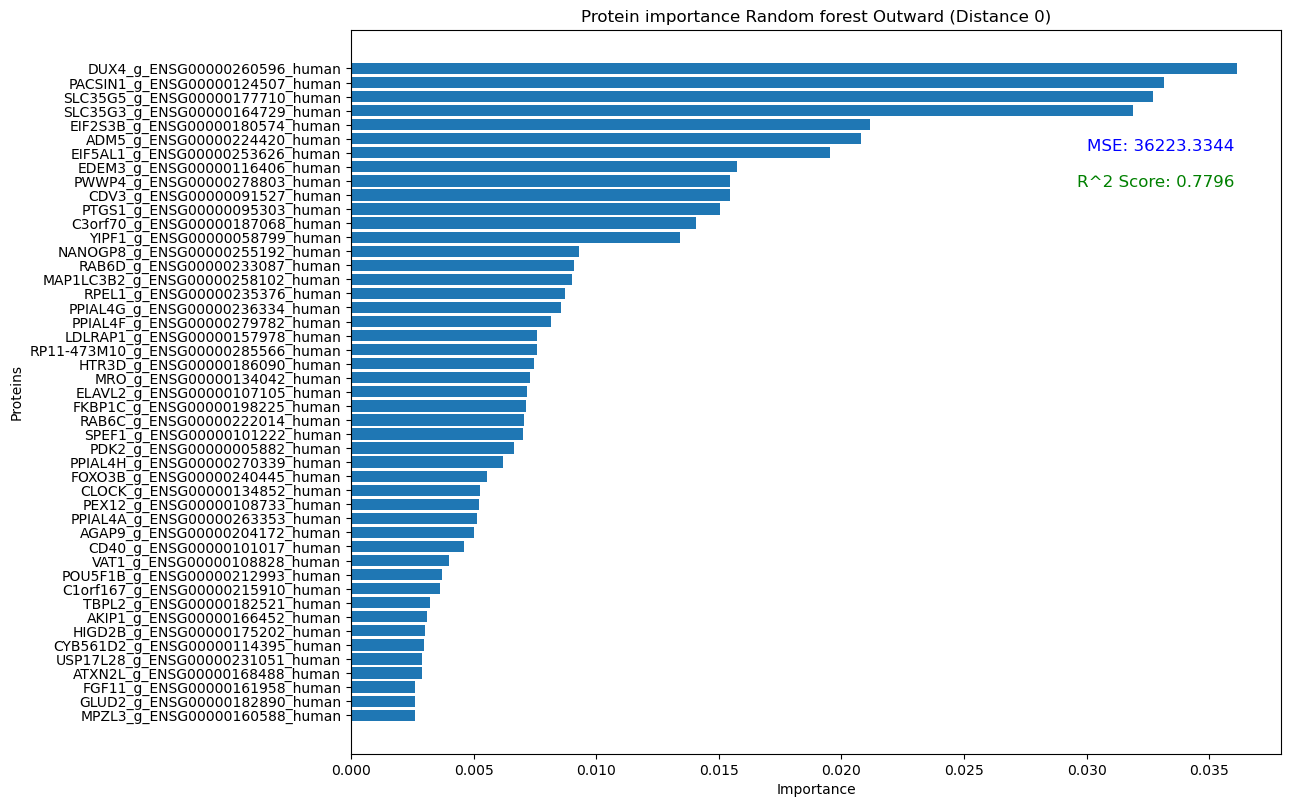

0.0036716380432172875
Porcentage_variability


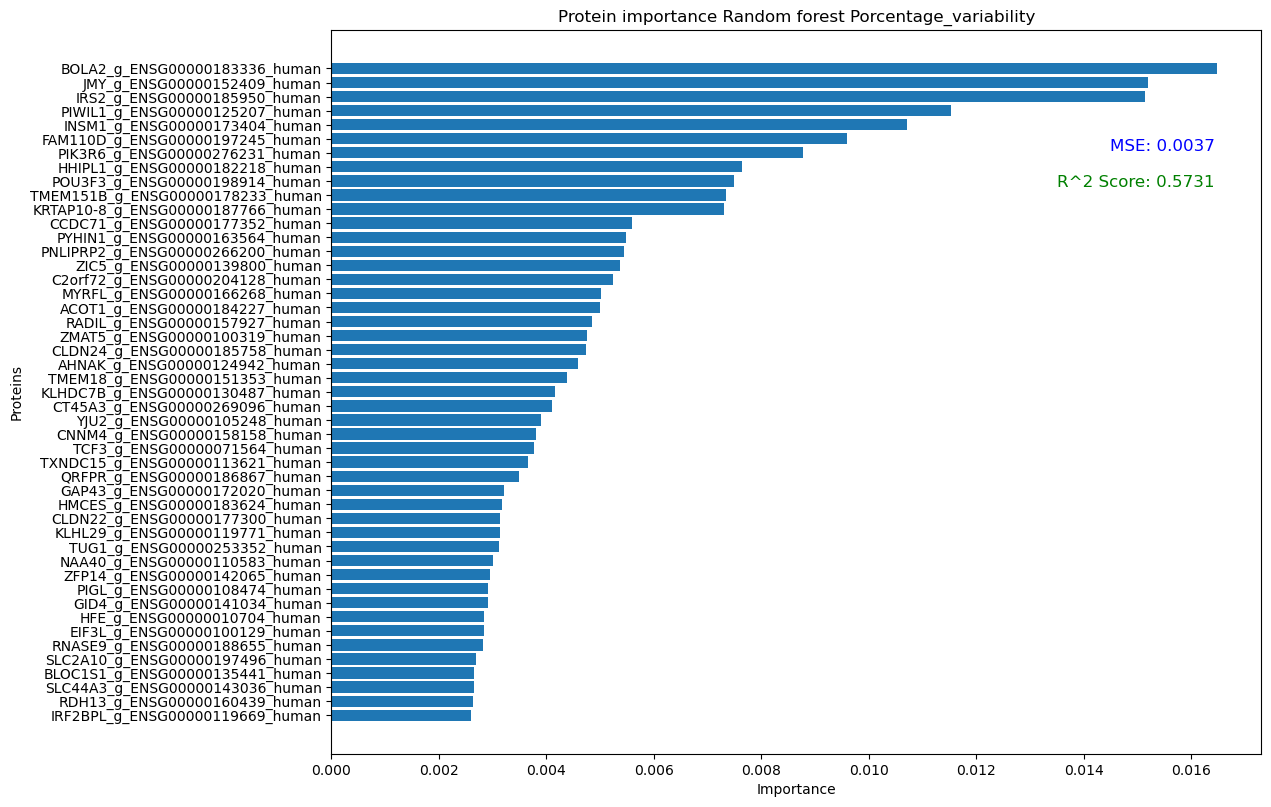

63.24534843127716
Chrom_num


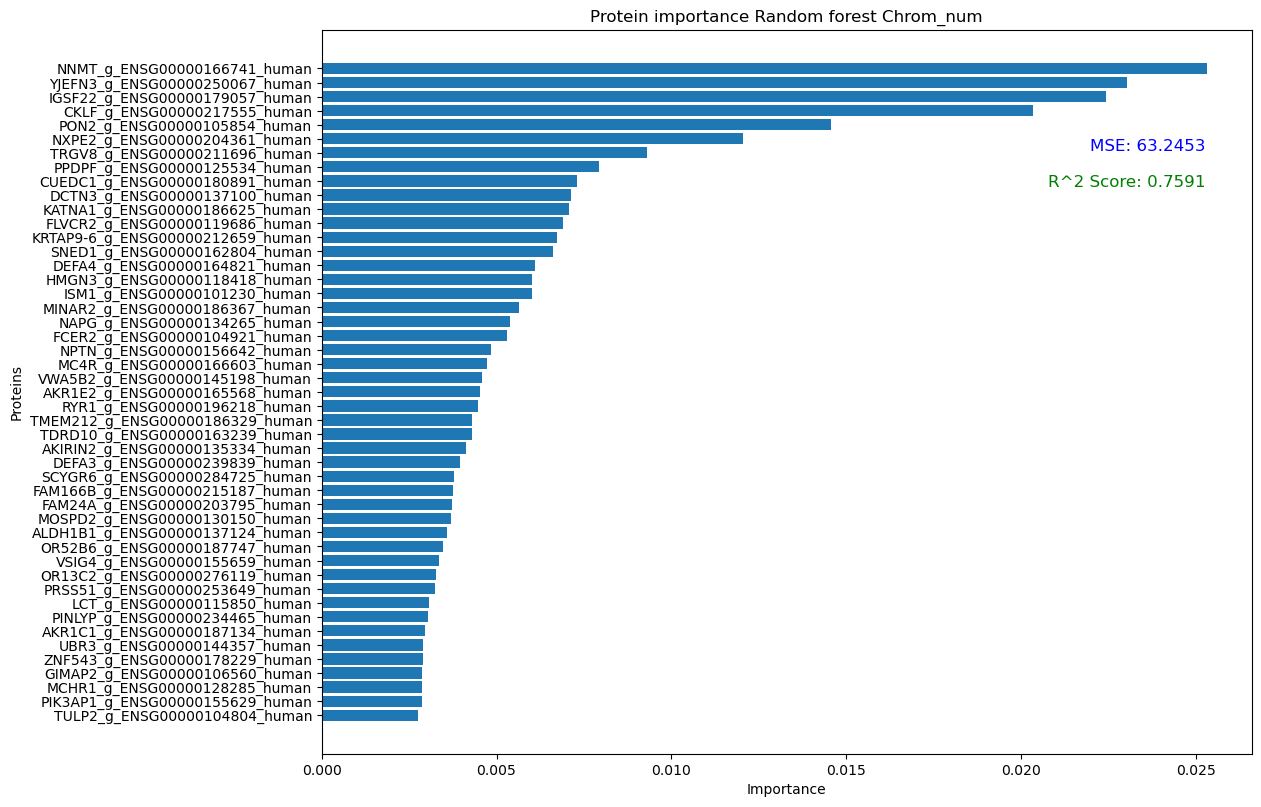

21.10152007181145
Longevity


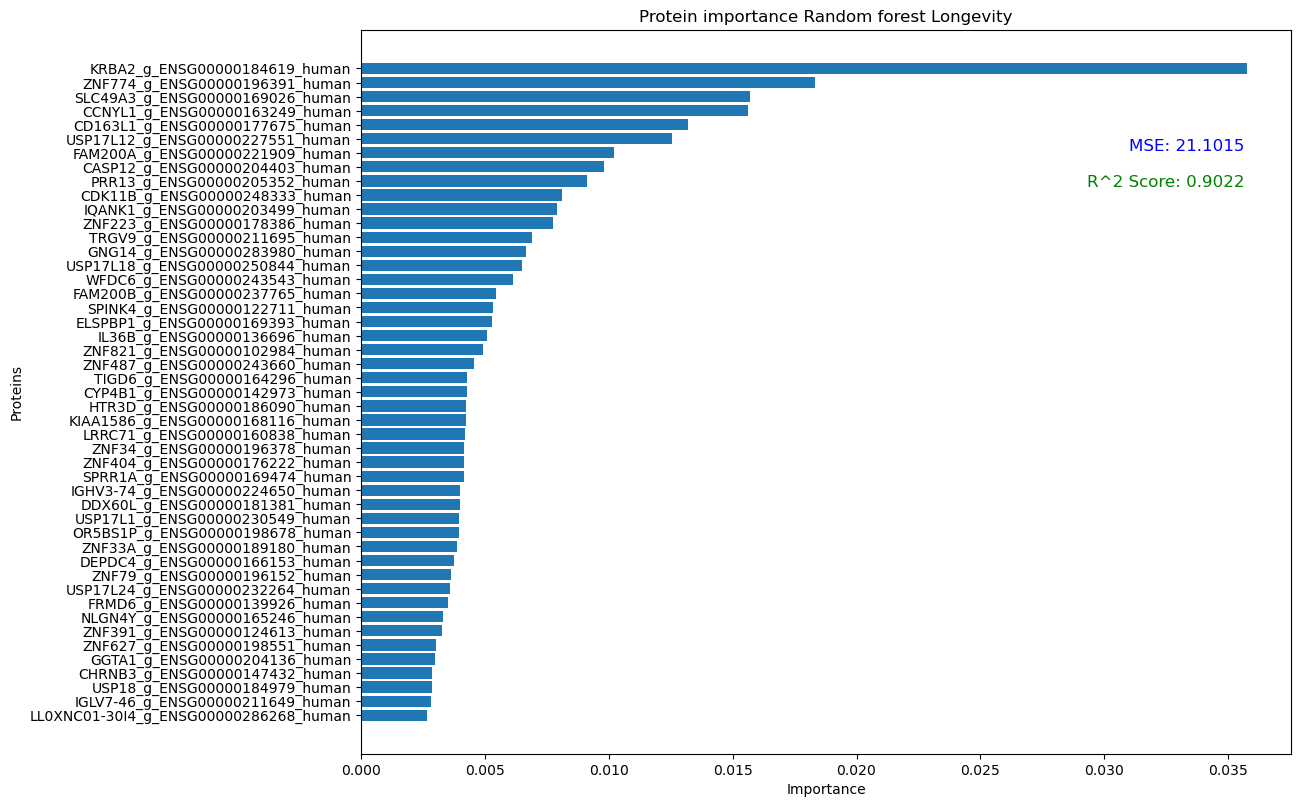

11968637339040.234
Total_telomere_size


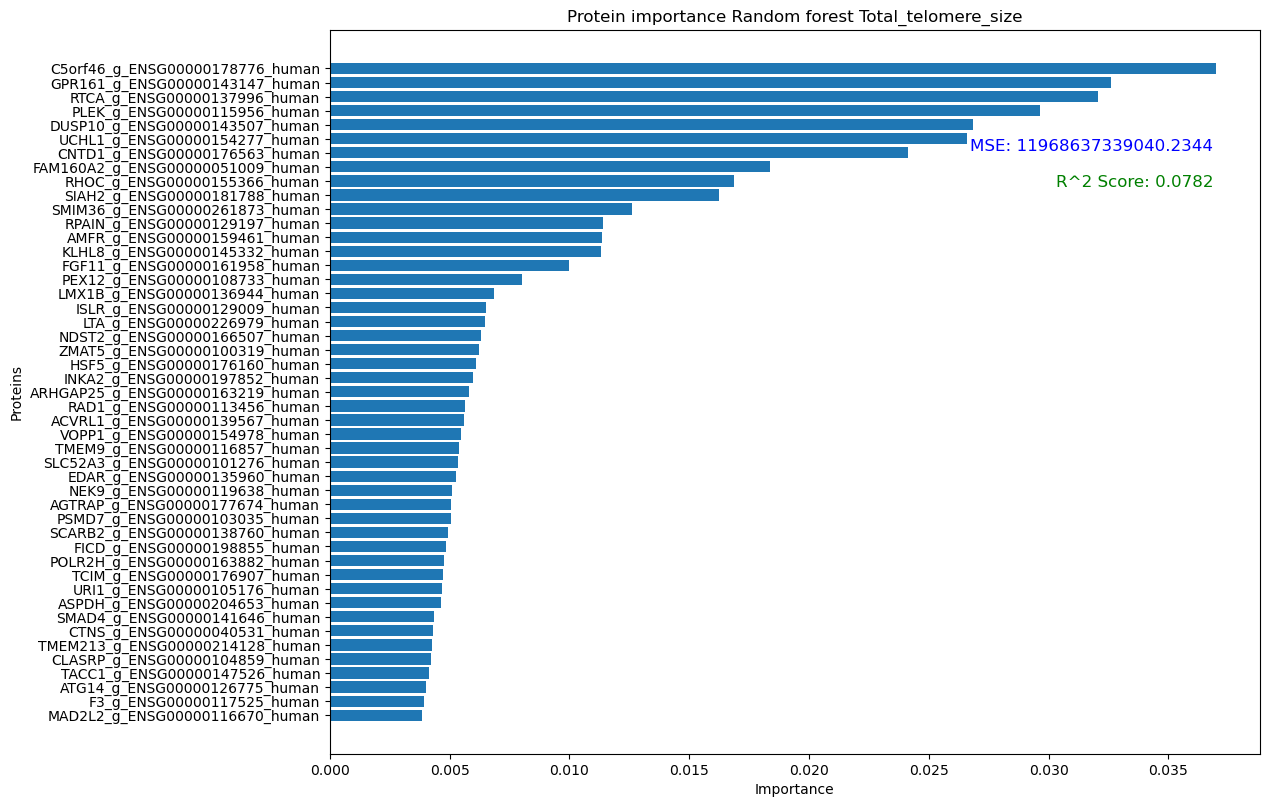

0.0036341854283888446
Porcentage_TTAGGG


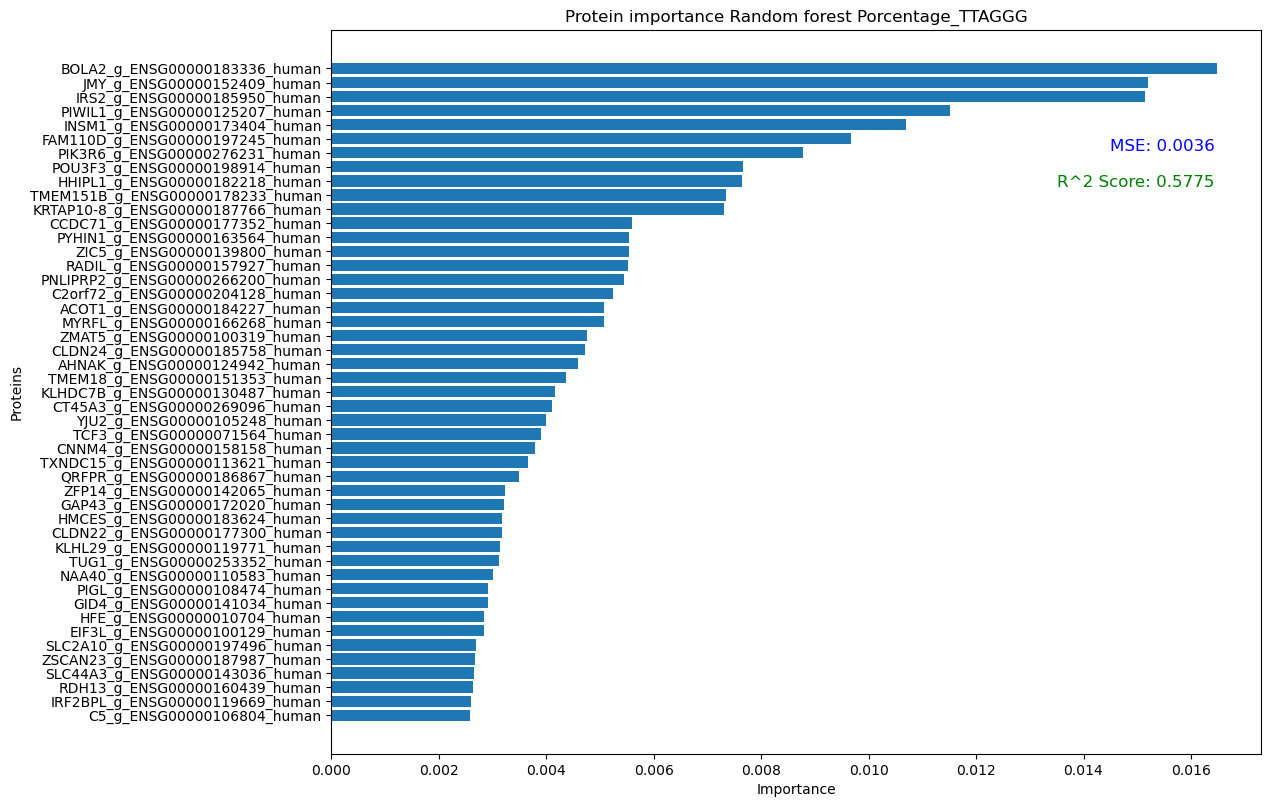

In [100]:
for feature_importance_df in feature_importance_dfs:
    column_name = feature_importance_df.iloc[0, 0]
    mean_squared_error = feature_importance_df.iloc[1, 1]
    R_Score = feature_importance_df.iloc[2, 1]
    print(mean_squared_error)
    feature_importance_df = feature_importance_df.iloc[3:]
    feature_importance_df_sorted = feature_importance_df.head(50)
    
    feature_importance_df_sorted = feature_importance_df_sorted.sort_values(by='importance', ascending=False)
    
    print(column_name)
    feature_importance_df_sorted = feature_importance_df_sorted.iloc[3:]
     
    num_features = len(feature_importance_df_sorted)
    figsize = (12, max(5, num_features / 5))
    plt.figure(figsize=figsize)
    plt.barh(feature_importance_df_sorted['feature'], feature_importance_df_sorted['importance'])
    plt.xlabel('Importance')
    plt.ylabel('Proteins')
    plt.text(0.95, 0.85, f'MSE: {mean_squared_error:.4f}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=12, color='blue')
    plt.text(0.95, 0.80, f'R^2 Score: {R_Score:.4f}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=12, color='green')

    plt.title(f'Protein importance Random forest {column_name}')
    plt.gca().invert_yaxis() 
    plt.show()